In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

import seaborn as sns
%matplotlib inline
plt.style.use('bmh')



### 1.0 Data loading
<a id='1'></a>

We use pandas dataframe as data container. Each row is the one data sample.

Dataset from:
https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset

***Features Information:***

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

***Target:***

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [2]:
# load datasets
df_data = pd.read_excel('Dry_Bean_Dataset.xlsx')

# check loaded data
df_data.head()



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
# check data shape
print(df_data.shape)


(13611, 17)


### 2.0 Data preprocessing
<a id='2'></a>
Before performing any operations with data and model applying, it is necessary to be assured about absence of missing values and statistical parameters.

#### 2.1 Overview
<a id='21'></a>

Firsty, let's check base statistical paramenters for data and look for nan values

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# get stat for all Xi
df_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Different scale of features could be harmfull for model fitting, so before model applying data normalization will be used.

In [6]:
# returns sorted DF with nan percentage for each feature
def count_nan(df):
    n = df.shape[0] # get sample size
    series = df.isna().sum(axis=0) / n # calculate nan rate
    df = pd.DataFrame({"Feature":series.index, "Missing values, %":np.round(series.values*100, 2)}) # create df with missing percentage
    return df.sort_values(by="Missing values, %", ascending=False) # sort and return

In [7]:
count_nan(df_data)

,Feature,"Missing values, %"
0,Area,0.0
9,Solidity,0.0
15,ShapeFactor4,0.0
14,ShapeFactor3,0.0
13,ShapeFactor2,0.0
12,ShapeFactor1,0.0
11,Compactness,0.0
10,roundness,0.0
8,Extent,0.0
1,Perimeter,0.0


Fortunately, no missing values founded. 

#### 2.2 Encoding categorical data
<a id='22'></a>

Since only target variable don't have numeric type, only target will be encoded by number for better usability.

In [8]:
target = 'Class'
# get classes labels
labels = df_data[target].unique()
# create dictionaries for convenient encoding/decoding
class_decoder = dict([(n,l) for n,l in enumerate(labels)])
class_encoder = dict([(l,n) for n,l in enumerate(labels)])

class_decoder

{0: 'SEKER',
 1: 'BARBUNYA',
 2: 'BOMBAY',
 3: 'CALI',
 4: 'HOROZ',
 5: 'SIRA',
 6: 'DERMASON'}

In [9]:
# encode labels with nums
df_data[target] = df_data[target].apply(lambda x: class_encoder[x])

### 4.0 Feature engineering
<a id='4'></a>

In spite of small features count and dependency between target and features observed with naked eye (thanks to distribution plots), some correlation analysys should be made anyway. It is expected to reduce some unimportant features.

#### 4.1 Analysys
Since features are numeric while target is categorical, F-value estimation is good choise to determine relation between features and target. 

In [10]:
from sklearn.feature_selection import f_classif, mutual_info_classif
import tqdm

In [11]:
# extract data
columns_x = df_data.columns[0:-1]
x_, y_ = df_data[columns_x], df_data[target]

flist = []
plist = []
for col in tqdm.tqdm(columns_x):
    # extract feature and get estimation
    fstat, pvalue = f_classif(np.array(x_[col].copy()).reshape(-1, 1), y_)
    # append to lists
    flist.append(fstat[0])
    plist.append(pvalue[0])


    
df_description = pd.DataFrame({"Feature":columns_x, "f score":flist, 'p-value':plist})
df_description.sort_values(by='f score', ascending=False)

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1101.10it/s]


,Feature,f score,p-value
0,Area,29017.510462,0.0
6,ConvexArea,28961.791217,0.0
7,EquivDiameter,25444.547794,0.0
1,Perimeter,24283.663708,0.0
3,MinorAxisLength,22442.386382,0.0
2,MajorAxisLength,21622.237936,0.0
13,ShapeFactor2,12329.883853,0.0
12,ShapeFactor1,12081.321127,0.0
4,AspectRation,10376.979153,0.0
11,Compactness,10166.117904,0.0


It seems, that all features are informative enough for making prediction, so no data reducing will be performed

####    4.3 Normalization
<a id='43'></a>


In [12]:
# copy obj
df_data_norm = df_data.copy()
# normalize by columns
df_data_norm = (df_data_norm - df_data_norm.min(axis=0)) / (df_data_norm.max(axis=0) - df_data_norm.min(axis=0))
# target column should be unchanged
df_data_norm[target] = df_data[target]
# check results:
df_data_norm.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285,3.631181
std,0.125212,0.146710,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898,2.151782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406861,0.190064,0.302997,0.884146,2.000000
50%,0.103469,0.184992,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698,4.000000
75%,0.174691,0.309781,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


#### 4.4 Splitting data 
<a id='44'></a>


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# split data, shuffle before, use same proportion of classes, as was in full dataset
df_train, df_test = train_test_split(df_data_norm, test_size=0.3, shuffle=True, stratify=df_data[target])

In [15]:
# for more convenience, split by features and target
df_trainX, df_trainY = df_train.drop(columns=target), df_train[target]
df_testX, df_testY = df_test.drop(columns=target), df_test[target]

#### 4.5 Over-sampling data
<a id='45'></a>


In [16]:
from imblearn.over_sampling import RandomOverSampler

# create oversampler
ROS = RandomOverSampler(random_state=42)

# apply to data
df_trainX_os, df_trainY_os  = ROS.fit_resample(df_trainX, df_trainY)

print('Original dataset shape', df_trainY.value_counts())
print('Resample dataset shape', df_trainY_os.value_counts())

Original dataset shape Class
6    2482
5    1845
0    1419
4    1350
3    1141
1     925
2     365
Name: count, dtype: int64
Resample dataset shape Class
6    2482
1    2482
3    2482
4    2482
5    2482
2    2482
0    2482
Name: count, dtype: int64


# 1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 


#### 5.6 Feedforward NN
<a id='56'></a>

For the NN classifier classical architecture was choosen: 16-64-128-254-128-64-32-16-7.

'selu' was used as asctivation funtion mostly, but output layer uses 'linear' due to computational reasons.

L2 provides regularization technique to prevent overfitting as well as Dropout method, apllied to the most wide layers at the beginning.

Also, by default there is Xavier weights initialization applied which hinders fading through layers.

In [18]:
import tensorflow

2023-12-22 18:46:04.148416: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 18:46:04.150322: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 18:46:04.168608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 18:46:04.168628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 18:46:04.169158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [19]:
print("Num GPUs Available: ", tensorflow.config.list_physical_devices('GPU'))
print("Num CPUs Available: ", tensorflow.config.list_physical_devices('CPU'))

# I don't use GPU, because it's turned out that CPU has better performance.

Num GPUs Available:  []
Num CPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Caclulate class weights, since they are skewed enough

In [20]:
# count values
d = df_trainY.value_counts()
# create dict
weights = dict(zip(list(d.keys()),df_train.shape[0] / (7*np.array(d))))
weights

{6: 0.548348106365834,
 5: 0.737669376693767,
 0: 0.9591261451726568,
 4: 1.0081481481481482,
 3: 1.1928133216476775,
 1: 1.4713513513513514,
 2: 3.728767123287671}

In [21]:
tensorflow.keras.backend.set_floatx('float64')
#definition
tf_perceptron = tensorflow.keras.Sequential()

alpha = 1e-5
# adding layers
# ,kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)
tf_perceptron.add(tensorflow.keras.layers.Dense(16, activation="selu"))
tf_perceptron.add(tensorflow.keras.layers.Dense(64, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.1))
tf_perceptron.add(tensorflow.keras.layers.Dense(128, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.1))
tf_perceptron.add(tensorflow.keras.layers.Dense(256, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.2))
tf_perceptron.add(tensorflow.keras.layers.Dense(128, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.1))
tf_perceptron.add(tensorflow.keras.layers.Dense(64, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dense(32, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dense(7, activation="linear"))



# compilation, using Adam as decent adaptive optimizer, Crossenthropy loss.
# metrics only accuracy, because we check per lass one after each N epochs
tf_perceptron.compile(
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=["accuracy"])



# fit (just to build, learning will be later): 
# - shuffle, 
# - use weights since classes are skewed,
# - added validation data (test data), to check if overfitted
accuracy_stat = tf_perceptron.fit(df_trainX_os, df_trainY_os, 
                                  batch_size = 64,
                                  epochs = 1,
                                  shuffle = True,
                                  class_weight = weights,
                                  #steps_per_epoch = 10,
                                  verbose = 1,
                                  validation_data = (df_trainX, df_trainY),
                                  workers = 8,
                                  use_multiprocessing = True
                                  )
# describe model
tf_perceptron.summary()


272/272 [==============================] - 2s 3ms/step - loss: 0.4001 - accuracy: 0.8455 - val_loss: 0.3141 - val_accuracy: 0.8904
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33

#### Learning

Each k epochs, detailed scores is calculated, to control learning process. 190 epochs were the optimal

In [22]:
k = 20
clf_list_weights = []
for j in range(25):
    accuracy_stat_added = tf_perceptron.fit(df_trainX_os, df_trainY_os, 
                                  batch_size = 32,
                                  epochs = k,
                                  shuffle = True,
                                  class_weight = weights,
                                  #steps_per_epoch = 10,
                                  verbose = 1,
                                  validation_data = (df_trainX, df_trainY),
                                  workers = 8,
                                  use_multiprocessing = True
                                  )        
    
    for i in ['accuracy', 'loss', 'val_accuracy', 'val_loss']:
        accuracy_stat.history[i] += accuracy_stat_added.history[i]    
    print("=========EPOCHS FINISHED-{}=========".format(k*(j+1)))
    trs = check_accuracy_tf(df_trainX, df_trainY, tf_perceptron)
    tes = check_accuracy_tf(df_testX, df_testY, tf_perceptron)
    print("Train score: ", round(100*trs, 2), '%', sep='')
    print("Test score: ", round(100*tes, 2), '%', sep='')
    per_class_accuracy(df_testY, predict_tf(df_testX, tf_perceptron))
    #plot_confusion_matrix(df_testY, predict_tf(df_testX, tf_perceptron))  
    plot_accuracy(accuracy_stat.history, False)
    clf_list_weights.append(tf_perceptron.weights.copy())
## plotting accuracy during learning
#plot_accuracy(accuracy_stat.history)

Epoch 1/20
543/543 [==============================] - 2s 3ms/step - loss: 0.2778 - accuracy: 0.8957 - val_loss: 0.2989 - val_accuracy: 0.8922
Epoch 2/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2321 - accuracy: 0.9113 - val_loss: 0.2517 - val_accuracy: 0.9120
Epoch 3/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2252 - accuracy: 0.9136 - val_loss: 0.3073 - val_accuracy: 0.8884
Epoch 4/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2200 - accuracy: 0.9167 - val_loss: 0.2279 - val_accuracy: 0.9190
Epoch 5/20
543/543 [==============================] - 3s 5ms/step - loss: 0.2169 - accuracy: 0.9190 - val_loss: 0.2322 - val_accuracy: 0.9176
Epoch 6/20
543/543 [==============================] - 3s 5ms/step - loss: 0.2266 - accuracy: 0.9143 - val_loss: 0.2451 - val_accuracy: 0.9110
Epoch 7/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2208 - accuracy: 0.9173 - val_loss: 0.2648 - val_accuracy: 0.9061
Epoch 

NameError: name 'check_accuracy_tf' is not defined

Plot statistics:

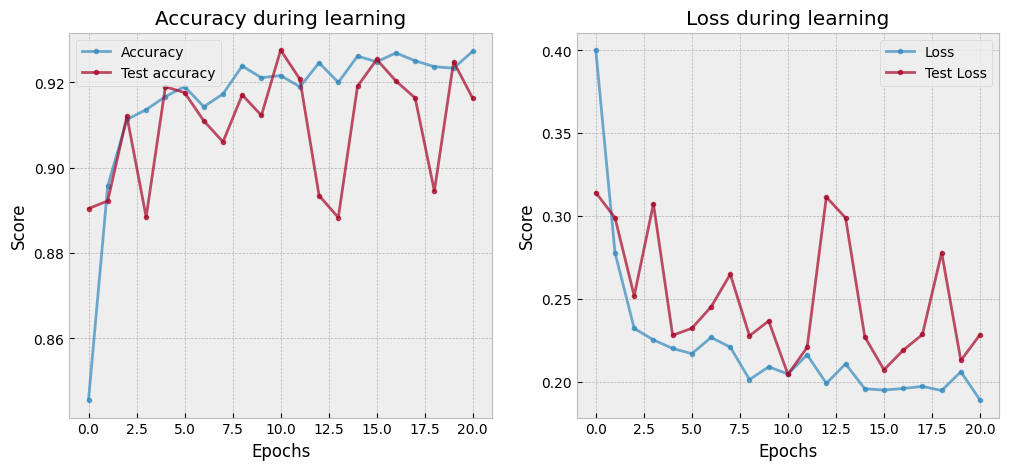

In [24]:
## plotting accuracy during learning
plot_accuracy(accuracy_stat.history, full=10)

In [25]:
trs = check_accuracy_tf(df_trainX, df_trainY, tf_perceptron)
tes = check_accuracy_tf(df_testX, df_testY, tf_perceptron)

print("Train score: ", round(100*trs, 2), '%', sep='')
print("Test score: ", round(100*tes, 2), '%', sep='')
per_class_accuracy(df_testY, predict_tf(df_testX, tf_perceptron))

128/128 [==============================] - 0s 999us/step
Train score: 91.62%
Test score: 91.14%
128/128 [==============================] - 0s 1ms/step
Class 0 accuracy: 96.71%
Class 1 accuracy: 93.95%
Class 2 accuracy: 100.0%
Class 3 accuracy: 94.68%
Class 4 accuracy: 92.21%
Class 5 accuracy: 92.41%
Class 6 accuracy: 82.42%
Overall: 93.2%


[96.711, 93.955, 100.0, 94.683, 92.215, 92.415, 82.425]

128/128 [==============================] - 0s 1ms/step


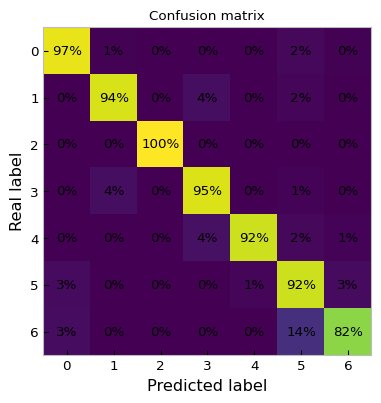

Class 0 accuracy: 96.71%
Class 1 accuracy: 93.95%
Class 2 accuracy: 100.0%
Class 3 accuracy: 94.68%
Class 4 accuracy: 92.21%
Class 5 accuracy: 92.41%
Class 6 accuracy: 82.42%
Overall: 93.2%


[96.711, 93.955, 100.0, 94.683, 92.215, 92.415, 82.425]

In [26]:
plot_confusion_matrix(df_testY, predict_tf(df_testX, tf_perceptron), imsize=4.4)  

# 2. Згорткові нейронні мережі
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).its


#### For that task, custom set of handwritten digits was prepared

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from matplotlib import image


import time
from IPython.display import clear_output
import sys
from os import listdir

import os

In [2]:
import tensorflow.keras.backend as tkb
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout, Conv2D, MaxPool2D, Input, BatchNormalization, Conv2DTranspose, Concatenate, Lambda, UpSampling2D
from keras.layers import LeakyReLU, ReLU, ELU 

2023-12-25 16:28:20.985434: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-25 16:28:20.986800: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-25 16:28:21.005461: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 16:28:21.005480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 16:28:21.006013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Custom dataset consists of png images of custom digits, located in separate folders for each digit. Method below loads all that data into single dataframe

In [ ]:
def upload_imgs_to_frame(root_path):
    X, Y = ['pixel{}'.format(i) for i in range(64*64)], ['label']
    df_base = pd.DataFrame(columns=X+Y)
    # images subfolders in root folder
    labels = [i for i in range(13)]
    folders = map(str, labels)
    # class labels
    i = 0
    for f, l in zip(folders, labels): # iterate by classes
        full_path = root_path + '\\' + f + '\\'
        df = pd.DataFrame(columns=X+Y)
        for images in os.listdir(full_path): # iterate by samples
            i += 1
            
            print("Processing image: {}, progress={}%".format(i, round(100*i / 537, 2))) # run-time progress 
            try:
                img = image.imread(full_path + images)
                img = np.mean(img[:, :, 0:3], axis=2)
                df.loc[i, X] = np.ravel(img)
                df.loc[i, Y] = l
            except:
                print(f"Loading error: image {full_path + images}")
                return
            
            clear_output(wait=True)
        df_base = pd.concat([df_base, df])
    return df_base

In [37]:
df_data = pd.read_csv('custom_digits_symbols.csv').drop(columns='Unnamed: 0')
df_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,0.941176,0.938562,0.934640,0.934640,0.934640,0.934640,0.934640,0.937255,0.937255,0.939869,...,0.926797,0.930719,0.933333,0.926797,0.934640,0.934640,0.930719,0.934640,0.934640,0
1,0.946405,0.946405,0.947712,0.946405,0.947712,0.934640,0.938562,0.934640,0.938562,0.934640,...,0.938562,0.937255,0.937255,0.941176,0.937255,0.937255,0.937255,0.937255,0.941176,0
2,0.950327,0.947712,0.947712,0.950327,0.950327,0.947712,0.947712,0.947712,0.943791,0.941176,...,0.894118,0.909804,0.925490,0.920261,0.941176,0.937255,0.937255,0.934641,0.934640,0
3,0.956863,0.956863,0.956863,0.956863,0.956863,0.950327,0.947712,0.950327,0.950327,0.950327,...,0.938562,0.934640,0.946405,0.934640,0.938562,0.938562,0.942484,0.946405,0.947712,0
4,0.975163,0.966013,0.975163,0.968627,0.972549,0.959477,0.952941,0.966013,0.959477,0.959477,...,0.950327,0.947712,0.946405,0.958170,0.947712,0.962092,0.951634,0.958170,0.951634,0


In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 4097 entries, pixel0 to label
dtypes: float64(4096), int64(1)
memory usage: 16.8 MB


In [39]:
df_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.943014,0.943151,0.943046,0.942988,0.943053,0.943718,0.943686,0.943338,0.943002,0.943243,...,0.940091,0.940066,0.940327,0.940086,0.940178,0.940110,0.940244,0.940169,0.940066,5.929236
std,0.042983,0.043142,0.043120,0.043418,0.043010,0.042874,0.042976,0.043014,0.042937,0.042609,...,0.043125,0.043050,0.042966,0.043146,0.042821,0.042899,0.042854,0.042956,0.042911,3.693811
min,0.836601,0.836601,0.831373,0.827451,0.839216,0.845752,0.845752,0.843137,0.839216,0.841830,...,0.818301,0.806536,0.785621,0.788235,0.835294,0.839216,0.839216,0.831373,0.824837,0.000000
25%,0.909804,0.909804,0.909804,0.908497,0.909804,0.909804,0.909804,0.909804,0.909804,0.912418,...,0.905882,0.905882,0.908497,0.907190,0.905882,0.905882,0.909804,0.908497,0.908497,3.000000
50%,0.951634,0.949020,0.949020,0.949020,0.949020,0.949020,0.952941,0.949020,0.949020,0.949020,...,0.943791,0.943791,0.945098,0.943791,0.943791,0.945098,0.945098,0.945098,0.945098,6.000000
75%,0.981699,0.983006,0.981699,0.981699,0.981699,0.984314,0.980392,0.981699,0.984314,0.981699,...,0.976471,0.977778,0.980392,0.977778,0.976471,0.976471,0.977778,0.976471,0.977778,9.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


So, sata already scaled to [0,1] 

In [41]:
sample_shape = (64,64) # imput shape of the image
lbls = [i for i in range(13)] # all labels
lbls_n = 13
y = 'label'
lbl_to_nam = {0:'0', 1:'1', 2:'2', 3:'3', 4:"4", 5:"5", 6:'6', 7:'7', 8:'8', 9:'9', 10:'-', 11:'+', 12:'='}

#### Samples overview

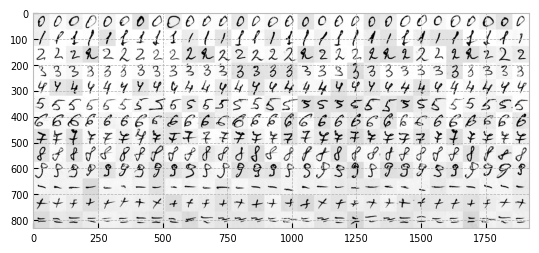

In [42]:


samples_count = 30


w = sample_shape[0]
arr = np.empty((lbls_n*w, samples_count*w))

for j in range(lbls_n): # by labels
    for i in range(samples_count): # by samples
        # obtain data
        x = np.array(df_data[df_data[y] == j].drop(columns=y).copy())
        np.random.shuffle(x)
        arr[j*w:(j+1)*w, i*w:(i+1)*w,] = np.reshape(x[i], sample_shape)
        
plt.imshow(arr, cmap='gray')

#### Variance overview

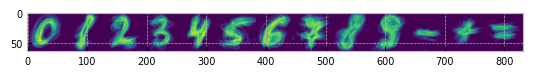

In [43]:
w = sample_shape[0]
arr = np.empty((w, lbls_n*w))

for j in range(lbls_n): # by labels
    # obtain data
    x = df_data[df_data[y] == j].drop(columns=y).copy()
    arr[:,j*w:(j+1)*w] = np.array(x.var()).reshape(sample_shape)

plt.imshow(arr)

#### Skewness of classes 

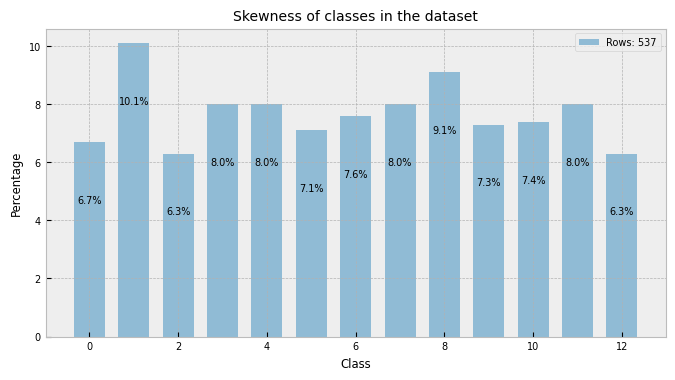

In [44]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

# count values
d = df_data[y].value_counts()

# barplot
plt.bar(d.keys(), np.round(100*d / sum(d), 1),
        alpha=0.5,width=0.7, 
        label="Rows: "+str(sum(d)))

# text percentage
for i, j in zip(d.keys(), np.round(100*d / sum(d), 1)):
    ax.text(i,j-2, str(j) + '%',
                       ha="center", va="center", color="k")

plt.ylabel('Percentage')
plt.xlabel('Class')
plt.legend(loc='upper right')
plt.title("Skewness of classes in the dataset")
plt.rcParams.update({'font.size': 8})

#### Splitting into x,y train, test arrays

In [45]:
dfx = df_data.drop(columns=y)
dfy = np.array(df_data[y])

In [46]:
# split dataset, save class balance
xtrain_ravel, xtest_ravel, ytrain, ytest = train_test_split(
    dfx,
    dfy,
    test_size=0.1, 
    stratify = dfy)

# split dataset, save class balance
xtrain, xtest, ytrain, ytest = train_test_split(
    np.array(dfx).reshape((-1, *sample_shape)),
    dfy,
    test_size=0.1, 
    stratify = dfy)


#### Data generator
Since dataset contains only small amount of samples, data generator is extremely needed


In [94]:
batch_size = 64

datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.11, # Randomly zoom image 
        brightness_range = None, # brightness shifting
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagenerator.fit(x_train.reshape(-1, 28, 28, 1))
train_generator = datagenerator.flow(xtrain.reshape(-1, *sample_shape, 1),
                                     ytrain, batch_size=batch_size,
                                     shuffle=True,
)


#### Overview generated data

(64, 64, 64, 1) (64,)


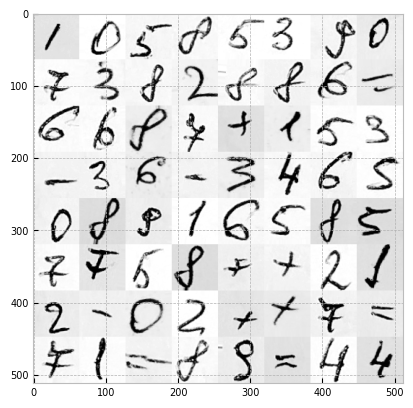

In [95]:
w = sample_shape[0]
arr = np.empty((8*w, 8*w))

for batch in train_generator:
    x, t = batch
    print(x.shape, t.shape)
    break
n=0
for j in range(8): 
    for i in range(8): 
        arr[j*w:(j+1)*w, i*w:(i+1)*w,] = np.squeeze(x[n,:,:])
        n+=1
        
plt.imshow(arr, cmap='gray')

#### Extend test data with generator

In [96]:
datagenerator_test = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.11, # Randomly zoom image 
        brightness_range = None, # brightness shifting
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagenerator.fit(x_train.reshape(-1, 28, 28, 1))
test_generator = datagenerator_test.flow(xtest.reshape(-1, *sample_shape, 1), ytest, batch_size=1)


In [97]:
n = 0
xtest_ext = np.empty((4000, *sample_shape, 1))
ytest_ext = np.empty((4000,))

for batch in test_generator:
    xtest_ext[n, :, :],  ytest_ext[n] = batch
    n+=1
    if n >= 4000: break

### Model building
#### Callback for stat

In [52]:
class CallBackWeightsSaver(tf.keras.callbacks.Callback):
    def __init__(self, model, directory):
        super().__init__()
        self.model = model
        self.dir = directory
        try:
            os.mkdir(directory)
        except:
            print("Warning: directory already exists")
        

        
    def on_epoch_end(self, epoch, *args):
        self.model.save_weights(f'{self.dir}/model_weights_epoch{epoch}.h5')
      
        pass
 


In [53]:
from keras.callbacks import History 


#### Define model architecture

In [98]:
# shape of the input data
input_dim = (*sample_shape, 1)

# Pack description
# - Conv 2D , 2x
# - * Normalize batches
# - Activation
# - * Dropout layer, in purpose to reduce overfitting & force learning
# - Maxpool for reducing space


input_tnsr = Input(input_dim)
x = MaxPool2D((2,2))(input_tnsr)

# First 'pack' of convolutional layer
x = Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation=None)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.05)(x)
x = Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation=None)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.1)(x)
x = MaxPool2D((2,2))(x)

# second pack
x = Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation=None)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
#x = Dropout(0.05)(x)
x = Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation=None)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
#x = Dropout(0.08)(x)
x = MaxPool2D((2,2))(x)

# third, last pack
x = Conv2D(filters=128, kernel_size=(2,2), padding='valid', activation=None)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
#x = Dropout(0.1)(x)
x = MaxPool2D((2,2))(x)
x = Flatten()(x)

x = Dense(13, activation='softmax')(x)
out_tnsr = x

####  Compile, add otimizers/loss

In [99]:
nn_clf = keras.Model(input_tnsr, out_tnsr, name="cnn_clf")

In [100]:
nn_clf.compile(
               # loss=tf.keras.losses.MeanSquaredError(),
               # loss = bce,
                loss = tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.RMSprop(), #learning_rate=1e-5
#               optimizer=tensorflow.keras.optimizers.SGD(nesterov=True),
              metrics=['accuracy'],
                    )

nn_clf.summary()

Model: "cnn_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 32, 32, 1)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 16)        160       
                                                                 
 batch_normalization_20 (Ba  (None, 30, 30, 16)        64        
 tchNormalization)                                               
                                                                 
 re_lu_20 (ReLU)             (None, 30, 30, 16)        0         
                                                                 
 dropout_22 (Dropout)        (None, 30, 30, 16)        0   

#### learning

In [101]:
weights_saver_callback = CallBackWeightsSaver(model=nn_clf, 
                                             directory='CD_baseline')
history = History()

In [102]:
nn_clf.fit(   train_generator,
                    batch_size = batch_size,
                    epochs = 2000,
                    shuffle = False,
                    verbose = 1,
                    validation_data = (xtest_ext, ytest_ext),
                    workers = -1,
                    use_multiprocessing = True,
                    callbacks=[history, weights_saver_callback],
                                      )

Epoch 1/2000
8/8 [==============================] - 2s 130ms/step - loss: 2.2815 - accuracy: 0.2857 - val_loss: 2.5579 - val_accuracy: 0.0740
Epoch 2/2000
8/8 [==============================] - 1s 112ms/step - loss: 1.2822 - accuracy: 0.6149 - val_loss: 2.5667 - val_accuracy: 0.0740
Epoch 3/2000
8/8 [==============================] - 1s 113ms/step - loss: 0.9285 - accuracy: 0.7246 - val_loss: 2.5772 - val_accuracy: 0.0740
Epoch 4/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.6891 - accuracy: 0.8157 - val_loss: 2.5913 - val_accuracy: 0.0740
Epoch 5/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.5503 - accuracy: 0.8489 - val_loss: 2.6171 - val_accuracy: 0.0740
Epoch 6/2000
8/8 [==============================] - 1s 110ms/step - loss: 0.5369 - accuracy: 0.8509 - val_loss: 2.6746 - val_accuracy: 0.0740
Epoch 7/2000
8/8 [==============================] - 1s 111ms/step - loss: 0.4341 - accuracy: 0.8820 - val_loss: 2.7362 - val_accuracy: 0.0740
Epoch 

8/8 [==============================] - 1s 163ms/step - loss: 0.0120 - accuracy: 0.9938 - val_loss: 0.0484 - val_accuracy: 0.9835
Epoch 116/2000
8/8 [==============================] - 1s 166ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9802
Epoch 117/2000
8/8 [==============================] - 1s 165ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9830
Epoch 118/2000
8/8 [==============================] - 1s 166ms/step - loss: 8.3511e-04 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9848
Epoch 119/2000
8/8 [==============================] - 1s 162ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9790
Epoch 120/2000
8/8 [==============================] - 1s 172ms/step - loss: 7.7651e-04 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9762
Epoch 121/2000
8/8 [==============================] - 1s 161ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4504 - val_accuracy: 0.8620

Epoch 172/2000
8/8 [==============================] - 1s 162ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9898
Epoch 173/2000
8/8 [==============================] - 1s 161ms/step - loss: 4.5862e-04 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9908
Epoch 174/2000
8/8 [==============================] - 1s 159ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9830
Epoch 175/2000
8/8 [==============================] - 1s 164ms/step - loss: 5.9684e-04 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9880
Epoch 176/2000
8/8 [==============================] - 1s 161ms/step - loss: 0.0129 - accuracy: 0.9979 - val_loss: 2.7054 - val_accuracy: 0.7155
Epoch 177/2000
8/8 [==============================] - 1s 161ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.3174 - val_accuracy: 0.6660
Epoch 178/2000
8/8 [==============================] - 1s 161ms/step - loss: 9.8906e-04 - accuracy: 1.0000 - val_loss: 0.7352 - v

Epoch 284/2000
8/8 [==============================] - 1s 159ms/step - loss: 2.5766e-04 - accuracy: 1.0000 - val_loss: 1.9309 - val_accuracy: 0.7408
Epoch 285/2000
8/8 [==============================] - 1s 159ms/step - loss: 4.0390e-04 - accuracy: 1.0000 - val_loss: 0.7156 - val_accuracy: 0.8070
Epoch 286/2000
8/8 [==============================] - 1s 158ms/step - loss: 3.0537e-04 - accuracy: 1.0000 - val_loss: 0.4480 - val_accuracy: 0.8442
Epoch 287/2000
8/8 [==============================] - 1s 163ms/step - loss: 2.2288e-04 - accuracy: 1.0000 - val_loss: 2.6294 - val_accuracy: 0.5675
Epoch 288/2000
8/8 [==============================] - 1s 162ms/step - loss: 3.4214e-04 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9100
Epoch 289/2000
8/8 [==============================] - 1s 163ms/step - loss: 2.7379e-04 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9878
Epoch 290/2000
8/8 [==============================] - 1s 159ms/step - loss: 8.9592e-05 - accuracy: 1.0000 - val_

8/8 [==============================] - 1s 160ms/step - loss: 3.6706e-05 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 395/2000
8/8 [==============================] - 1s 160ms/step - loss: 6.8804e-05 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9962
Epoch 396/2000
8/8 [==============================] - 1s 160ms/step - loss: 1.2922e-05 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9972
Epoch 397/2000
8/8 [==============================] - 1s 160ms/step - loss: 6.6566e-04 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9752
Epoch 398/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.6897e-04 - accuracy: 1.0000 - val_loss: 0.1364 - val_accuracy: 0.9560
Epoch 399/2000
8/8 [==============================] - 1s 162ms/step - loss: 5.2869e-05 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9745
Epoch 400/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.5616e-04 - accuracy: 1.0000 - val_loss: 2.4601 - 

8/8 [==============================] - 1s 160ms/step - loss: 3.4295e-05 - accuracy: 1.0000 - val_loss: 5.1834 - val_accuracy: 0.5948
Epoch 505/2000
8/8 [==============================] - 1s 164ms/step - loss: 4.2892e-05 - accuracy: 1.0000 - val_loss: 2.1230 - val_accuracy: 0.7302
Epoch 506/2000
8/8 [==============================] - 1s 159ms/step - loss: 2.0754e-05 - accuracy: 1.0000 - val_loss: 1.0965 - val_accuracy: 0.7768
Epoch 507/2000
8/8 [==============================] - 1s 163ms/step - loss: 6.1012e-05 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9720
Epoch 508/2000
8/8 [==============================] - 1s 161ms/step - loss: 5.1245e-05 - accuracy: 1.0000 - val_loss: 1.1554 - val_accuracy: 0.7422
Epoch 509/2000
8/8 [==============================] - 1s 162ms/step - loss: 3.8829e-05 - accuracy: 1.0000 - val_loss: 3.0995 - val_accuracy: 0.6275
Epoch 510/2000
8/8 [==============================] - 1s 171ms/step - loss: 4.8390e-05 - accuracy: 1.0000 - val_loss: 3.2502 - 

8/8 [==============================] - 1s 160ms/step - loss: 5.9794e-05 - accuracy: 1.0000 - val_loss: 0.8448 - val_accuracy: 0.8383
Epoch 615/2000
8/8 [==============================] - 1s 164ms/step - loss: 8.5673e-05 - accuracy: 1.0000 - val_loss: 0.4231 - val_accuracy: 0.9115
Epoch 616/2000
8/8 [==============================] - 1s 161ms/step - loss: 2.4462e-04 - accuracy: 1.0000 - val_loss: 1.0576 - val_accuracy: 0.7853
Epoch 617/2000
8/8 [==============================] - 1s 162ms/step - loss: 1.5774e-04 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9340
Epoch 618/2000
8/8 [==============================] - 1s 163ms/step - loss: 1.5546e-04 - accuracy: 1.0000 - val_loss: 3.3816 - val_accuracy: 0.7025
Epoch 619/2000
8/8 [==============================] - 1s 164ms/step - loss: 1.8343e-04 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.9537
Epoch 620/2000
8/8 [==============================] - 1s 159ms/step - loss: 3.2964e-05 - accuracy: 1.0000 - val_loss: 0.2249 - 

8/8 [==============================] - 1s 160ms/step - loss: 4.1588e-05 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 725/2000
8/8 [==============================] - 1s 172ms/step - loss: 1.3841e-05 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9978
Epoch 726/2000
8/8 [==============================] - 1s 163ms/step - loss: 1.2967e-05 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9968
Epoch 727/2000
8/8 [==============================] - 1s 161ms/step - loss: 1.1184e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9958
Epoch 728/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.9807e-05 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9938
Epoch 729/2000
8/8 [==============================] - 1s 162ms/step - loss: 2.2064e-05 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9982
Epoch 730/2000
8/8 [==============================] - 1s 160ms/step - loss: 1.5711e-05 - accuracy: 1.0000 - val_loss: 0.0059 - 

8/8 [==============================] - 1s 158ms/step - loss: 1.2431e-05 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9925
Epoch 835/2000
8/8 [==============================] - 1s 160ms/step - loss: 6.5572e-05 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9948
Epoch 836/2000
8/8 [==============================] - 1s 164ms/step - loss: 1.2047e-04 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9880
Epoch 837/2000
8/8 [==============================] - 1s 158ms/step - loss: 2.4541e-05 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 838/2000
8/8 [==============================] - 1s 157ms/step - loss: 1.5558e-05 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9925
Epoch 839/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.2302e-05 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9935
Epoch 840/2000
8/8 [==============================] - 1s 145ms/step - loss: 2.0155e-05 - accuracy: 1.0000 - val_loss: 0.0102 - 

8/8 [==============================] - 1s 157ms/step - loss: 4.6062e-06 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9980
Epoch 945/2000
8/8 [==============================] - 1s 156ms/step - loss: 1.8017e-05 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9968
Epoch 946/2000
8/8 [==============================] - 1s 157ms/step - loss: 7.5927e-06 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9972
Epoch 947/2000
8/8 [==============================] - 1s 166ms/step - loss: 1.3443e-05 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9958
Epoch 948/2000
8/8 [==============================] - 1s 156ms/step - loss: 4.8572e-05 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9868
Epoch 949/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.2301e-05 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 950/2000
8/8 [==============================] - 1s 161ms/step - loss: 1.0509e-05 - accuracy: 1.0000 - val_loss: 0.0319 - 

8/8 [==============================] - 1s 160ms/step - loss: 5.1646e-06 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9930
Epoch 1055/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.1527e-05 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 0.9938
Epoch 1056/2000
8/8 [==============================] - 1s 156ms/step - loss: 8.8248e-06 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9942
Epoch 1057/2000
8/8 [==============================] - 1s 165ms/step - loss: 4.8613e-06 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9955
Epoch 1058/2000
8/8 [==============================] - 1s 160ms/step - loss: 1.5497e-05 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9935
Epoch 1059/2000
8/8 [==============================] - 1s 163ms/step - loss: 2.2175e-05 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9715
Epoch 1060/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.3181e-05 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 161ms/step - loss: 1.1748e-05 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9918
Epoch 1110/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.7116e-05 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9950
Epoch 1111/2000
8/8 [==============================] - 1s 160ms/step - loss: 5.7923e-06 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9960
Epoch 1112/2000
8/8 [==============================] - 1s 170ms/step - loss: 1.8350e-05 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9695
Epoch 1113/2000
8/8 [==============================] - 1s 156ms/step - loss: 5.6725e-06 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 0.9657
Epoch 1114/2000
8/8 [==============================] - 1s 157ms/step - loss: 1.3047e-05 - accuracy: 1.0000 - val_loss: 0.4190 - val_accuracy: 0.8965
Epoch 1115/2000
8/8 [==============================] - 1s 160ms/step - loss: 3.9620e-05 - accuracy: 1.0000 - val_loss: 1.4

8/8 [==============================] - 1s 158ms/step - loss: 1.0007e-05 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy: 0.8762
Epoch 1165/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.2965e-05 - accuracy: 1.0000 - val_loss: 0.2990 - val_accuracy: 0.8998
Epoch 1166/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.9572e-05 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 0.9535
Epoch 1167/2000
8/8 [==============================] - 1s 162ms/step - loss: 1.8452e-05 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9978
Epoch 1168/2000
8/8 [==============================] - 1s 158ms/step - loss: 8.7632e-06 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9988
Epoch 1169/2000
8/8 [==============================] - 1s 160ms/step - loss: 3.1760e-05 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9972
Epoch 1170/2000
8/8 [==============================] - 1s 157ms/step - loss: 3.2532e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 159ms/step - loss: 7.2622e-05 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 1220/2000
8/8 [==============================] - 1s 159ms/step - loss: 5.7930e-06 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9982
Epoch 1221/2000
8/8 [==============================] - 1s 157ms/step - loss: 1.4135e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9982
Epoch 1222/2000
8/8 [==============================] - 1s 163ms/step - loss: 3.9514e-06 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9982
Epoch 1223/2000
8/8 [==============================] - 1s 157ms/step - loss: 1.2316e-04 - accuracy: 1.0000 - val_loss: 0.3428 - val_accuracy: 0.9167
Epoch 1224/2000
8/8 [==============================] - 1s 161ms/step - loss: 2.8497e-05 - accuracy: 1.0000 - val_loss: 0.2289 - val_accuracy: 0.9363
Epoch 1225/2000
8/8 [==============================] - 1s 159ms/step - loss: 2.9390e-05 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 161ms/step - loss: 2.9839e-06 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9788
Epoch 1275/2000
8/8 [==============================] - 1s 155ms/step - loss: 6.1291e-05 - accuracy: 1.0000 - val_loss: 1.7551 - val_accuracy: 0.7575
Epoch 1276/2000
8/8 [==============================] - 1s 166ms/step - loss: 1.6210e-05 - accuracy: 1.0000 - val_loss: 1.0928 - val_accuracy: 0.8077
Epoch 1277/2000
8/8 [==============================] - 1s 161ms/step - loss: 7.7749e-06 - accuracy: 1.0000 - val_loss: 0.4632 - val_accuracy: 0.8798
Epoch 1278/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.4320e-05 - accuracy: 1.0000 - val_loss: 0.2678 - val_accuracy: 0.9147
Epoch 1279/2000
8/8 [==============================] - 1s 162ms/step - loss: 1.6878e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9802
Epoch 1280/2000
8/8 [==============================] - 1s 163ms/step - loss: 1.4405e-05 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 162ms/step - loss: 5.1081e-06 - accuracy: 1.0000 - val_loss: 4.3574 - val_accuracy: 0.5795
Epoch 1385/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.3263e-05 - accuracy: 1.0000 - val_loss: 0.6582 - val_accuracy: 0.8417
Epoch 1386/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.3623e-05 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9818
Epoch 1387/2000
8/8 [==============================] - 1s 161ms/step - loss: 7.1112e-06 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 1388/2000
8/8 [==============================] - 1s 158ms/step - loss: 7.4294e-06 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9970
Epoch 1389/2000
8/8 [==============================] - 1s 162ms/step - loss: 3.6800e-06 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9975
Epoch 1390/2000
8/8 [==============================] - 1s 166ms/step - loss: 8.3490e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 162ms/step - loss: 6.7297e-05 - accuracy: 1.0000 - val_loss: 0.2429 - val_accuracy: 0.9065
Epoch 1495/2000
8/8 [==============================] - 1s 161ms/step - loss: 9.4402e-06 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9730
Epoch 1496/2000
8/8 [==============================] - 1s 160ms/step - loss: 8.5173e-06 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 0.9810
Epoch 1497/2000
8/8 [==============================] - 1s 161ms/step - loss: 4.4282e-04 - accuracy: 1.0000 - val_loss: 0.1124 - val_accuracy: 0.9500
Epoch 1498/2000
8/8 [==============================] - 1s 162ms/step - loss: 6.3190e-05 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9888
Epoch 1499/2000
8/8 [==============================] - 1s 161ms/step - loss: 9.1361e-05 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9808
Epoch 1500/2000
8/8 [==============================] - 1s 157ms/step - loss: 5.1052e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 161ms/step - loss: 8.2996e-06 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9855
Epoch 1550/2000
8/8 [==============================] - 1s 159ms/step - loss: 9.7267e-06 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9495
Epoch 1551/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.9404e-05 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9870
Epoch 1552/2000
8/8 [==============================] - 1s 162ms/step - loss: 2.4911e-06 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 0.9935
Epoch 1553/2000
8/8 [==============================] - 1s 158ms/step - loss: 6.2357e-06 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9988
Epoch 1554/2000
8/8 [==============================] - 1s 164ms/step - loss: 8.2065e-06 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 0.9980
Epoch 1555/2000
8/8 [==============================] - 1s 158ms/step - loss: 7.0350e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 161ms/step - loss: 3.3546e-05 - accuracy: 1.0000 - val_loss: 3.8337 - val_accuracy: 0.6717
Epoch 1605/2000
8/8 [==============================] - 1s 157ms/step - loss: 4.8159e-06 - accuracy: 1.0000 - val_loss: 2.8986 - val_accuracy: 0.7222
Epoch 1606/2000
8/8 [==============================] - 1s 163ms/step - loss: 3.9520e-06 - accuracy: 1.0000 - val_loss: 1.6986 - val_accuracy: 0.7935
Epoch 1607/2000
8/8 [==============================] - 1s 161ms/step - loss: 6.7934e-06 - accuracy: 1.0000 - val_loss: 0.6467 - val_accuracy: 0.8798
Epoch 1608/2000
8/8 [==============================] - 1s 164ms/step - loss: 2.0406e-05 - accuracy: 1.0000 - val_loss: 2.0112 - val_accuracy: 0.7735
Epoch 1609/2000
8/8 [==============================] - 1s 160ms/step - loss: 4.9467e-05 - accuracy: 1.0000 - val_loss: 2.8600 - val_accuracy: 0.7232
Epoch 1610/2000
8/8 [==============================] - 1s 160ms/step - loss: 7.2167e-05 - accuracy: 1.0000 - val_loss: 7.6

8/8 [==============================] - 1s 160ms/step - loss: 3.2063e-06 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 1660/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.4510e-06 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9888
Epoch 1661/2000
8/8 [==============================] - 1s 157ms/step - loss: 4.1130e-06 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9925
Epoch 1662/2000
8/8 [==============================] - 1s 161ms/step - loss: 5.8044e-06 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9955
Epoch 1663/2000
8/8 [==============================] - 1s 164ms/step - loss: 4.1912e-06 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9928
Epoch 1664/2000
8/8 [==============================] - 1s 161ms/step - loss: 1.4477e-06 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9948
Epoch 1665/2000
8/8 [==============================] - 1s 159ms/step - loss: 2.1013e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 159ms/step - loss: 3.9017e-06 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9988
Epoch 1715/2000
8/8 [==============================] - 1s 159ms/step - loss: 9.5215e-06 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9988
Epoch 1716/2000
8/8 [==============================] - 1s 156ms/step - loss: 1.7400e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 1717/2000
8/8 [==============================] - 1s 159ms/step - loss: 3.1452e-06 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 1718/2000
8/8 [==============================] - 1s 162ms/step - loss: 3.4410e-06 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9990
Epoch 1719/2000
8/8 [==============================] - 1s 158ms/step - loss: 3.1182e-06 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 1720/2000
8/8 [==============================] - 1s 158ms/step - loss: 1.6389e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 155ms/step - loss: 2.8656e-05 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9880
Epoch 1770/2000
8/8 [==============================] - 1s 159ms/step - loss: 3.5304e-06 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9932
Epoch 1771/2000
8/8 [==============================] - 1s 165ms/step - loss: 3.0098e-06 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9960
Epoch 1772/2000
8/8 [==============================] - 1s 160ms/step - loss: 1.7063e-06 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 1773/2000
8/8 [==============================] - 1s 157ms/step - loss: 2.1568e-06 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9985
Epoch 1774/2000
8/8 [==============================] - 1s 160ms/step - loss: 1.0884e-05 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9982
Epoch 1775/2000
8/8 [==============================] - 1s 156ms/step - loss: 5.2134e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 169ms/step - loss: 6.9008e-06 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 1825/2000
8/8 [==============================] - 1s 170ms/step - loss: 8.8866e-06 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 1826/2000
8/8 [==============================] - 1s 164ms/step - loss: 3.6549e-06 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 1827/2000
8/8 [==============================] - 1s 158ms/step - loss: 4.0614e-06 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9978
Epoch 1828/2000
8/8 [==============================] - 1s 159ms/step - loss: 3.7099e-06 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9988
Epoch 1829/2000
8/8 [==============================] - 1s 165ms/step - loss: 4.0893e-06 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9998
Epoch 1830/2000
8/8 [==============================] - 1s 161ms/step - loss: 4.6749e-06 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 163ms/step - loss: 2.7733e-06 - accuracy: 1.0000 - val_loss: 0.2140 - val_accuracy: 0.9280
Epoch 1880/2000
8/8 [==============================] - 1s 161ms/step - loss: 1.6218e-06 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9627
Epoch 1881/2000
8/8 [==============================] - 1s 161ms/step - loss: 2.9091e-06 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9895
Epoch 1882/2000
8/8 [==============================] - 1s 157ms/step - loss: 2.9059e-06 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9978
Epoch 1883/2000
8/8 [==============================] - 1s 161ms/step - loss: 4.3836e-06 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9838
Epoch 1884/2000
8/8 [==============================] - 1s 157ms/step - loss: 4.9243e-06 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9995
Epoch 1885/2000
8/8 [==============================] - 1s 161ms/step - loss: 2.4205e-05 - accuracy: 1.0000 - val_loss: 0.7

8/8 [==============================] - 1s 158ms/step - loss: 3.9031e-06 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 0.9968
Epoch 1935/2000
8/8 [==============================] - 1s 160ms/step - loss: 1.9167e-05 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 1936/2000
8/8 [==============================] - 1s 158ms/step - loss: 7.6732e-06 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9982
Epoch 1937/2000
8/8 [==============================] - 1s 165ms/step - loss: 6.3003e-06 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9982
Epoch 1938/2000
8/8 [==============================] - 1s 161ms/step - loss: 8.5184e-06 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9980
Epoch 1939/2000
8/8 [==============================] - 1s 164ms/step - loss: 1.2512e-06 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9980
Epoch 1940/2000
8/8 [==============================] - 1s 159ms/step - loss: 4.4094e-05 - accuracy: 1.0000 - val_loss: 0.0

8/8 [==============================] - 1s 160ms/step - loss: 2.5255e-05 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9970
Epoch 1990/2000
8/8 [==============================] - 1s 160ms/step - loss: 2.7815e-06 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9968
Epoch 1991/2000
8/8 [==============================] - 1s 160ms/step - loss: 2.8153e-06 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9970
Epoch 1992/2000
8/8 [==============================] - 1s 162ms/step - loss: 3.4246e-06 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9965
Epoch 1993/2000
8/8 [==============================] - 1s 160ms/step - loss: 3.7218e-06 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9970
Epoch 1994/2000
8/8 [==============================] - 1s 159ms/step - loss: 1.1088e-05 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9962
Epoch 1995/2000
8/8 [==============================] - 1s 161ms/step - loss: 3.1611e-06 - accuracy: 1.0000 - val_loss: 0.0

In [ ]:
# Custom_Digits_NN/weights
#nn_clf.load_weights('CD_baseline/model_weights_epoch....h5')#

### Results

#### Convergence analysing

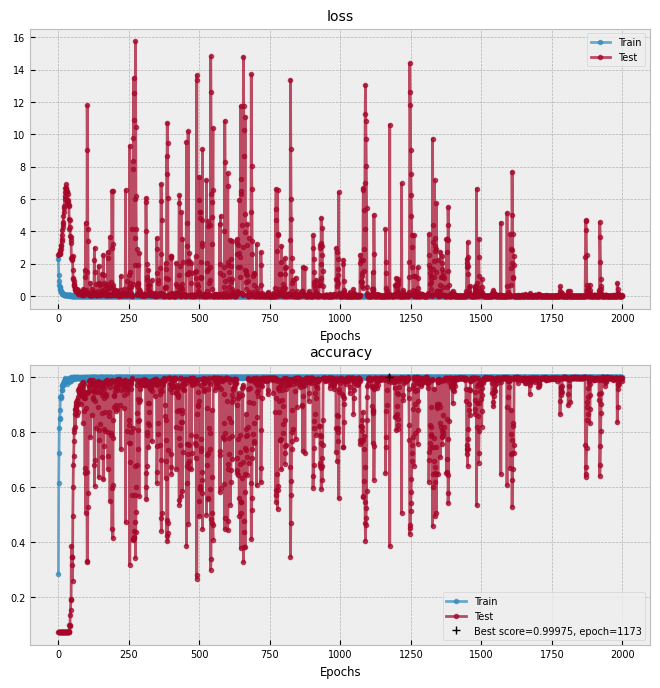

In [103]:
plot_learning_history(history)

#### Estimate performance

In [104]:
#SCORES
tr_out  = nn_clf.predict(xtrain)
ts_out  = nn_clf.predict(xtest_ext)

train_score = np.sum(ytrain == np.argmax(tr_out, axis=1)) / ytrain.shape[0]
test_score = np.sum(ytest_ext == np.argmax(ts_out, axis=1)) / ytest_ext.shape[0]

print("Train score:", train_score)
print("Test score:", test_score)

125/125 [==============================] - 1s 6ms/step
Train score: 1.0
Test score: 0.98825


#### per class accuracy

In [105]:
plot_confusion_matrix(ytest_ext, np.argmax(ts_out, axis=1))


Class 0 accuracy: 100.0%
Class 1 accuracy: 100.0%
Class 2 accuracy: 100.0%
Class 3 accuracy: 100.0%
Class 4 accuracy: 100.0%
Class 5 accuracy: 100.0%
Class 6 accuracy: 98.31%
Class 7 accuracy: 87.84%
Class 8 accuracy: 100.0%
Class 9 accuracy: 99.66%
Class 10 accuracy: 98.31%
Class 11 accuracy: 100.0%
Class 12 accuracy: 100.0%
Overall: 98.78%


[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 98.311,
 87.838,
 100.0,
 99.662,
 98.311,
 100.0,
 100.0]

#### Missclassified samples

Total count of missclassified: 47


IndexError: index 47 is out of bounds for axis 0 with size 47

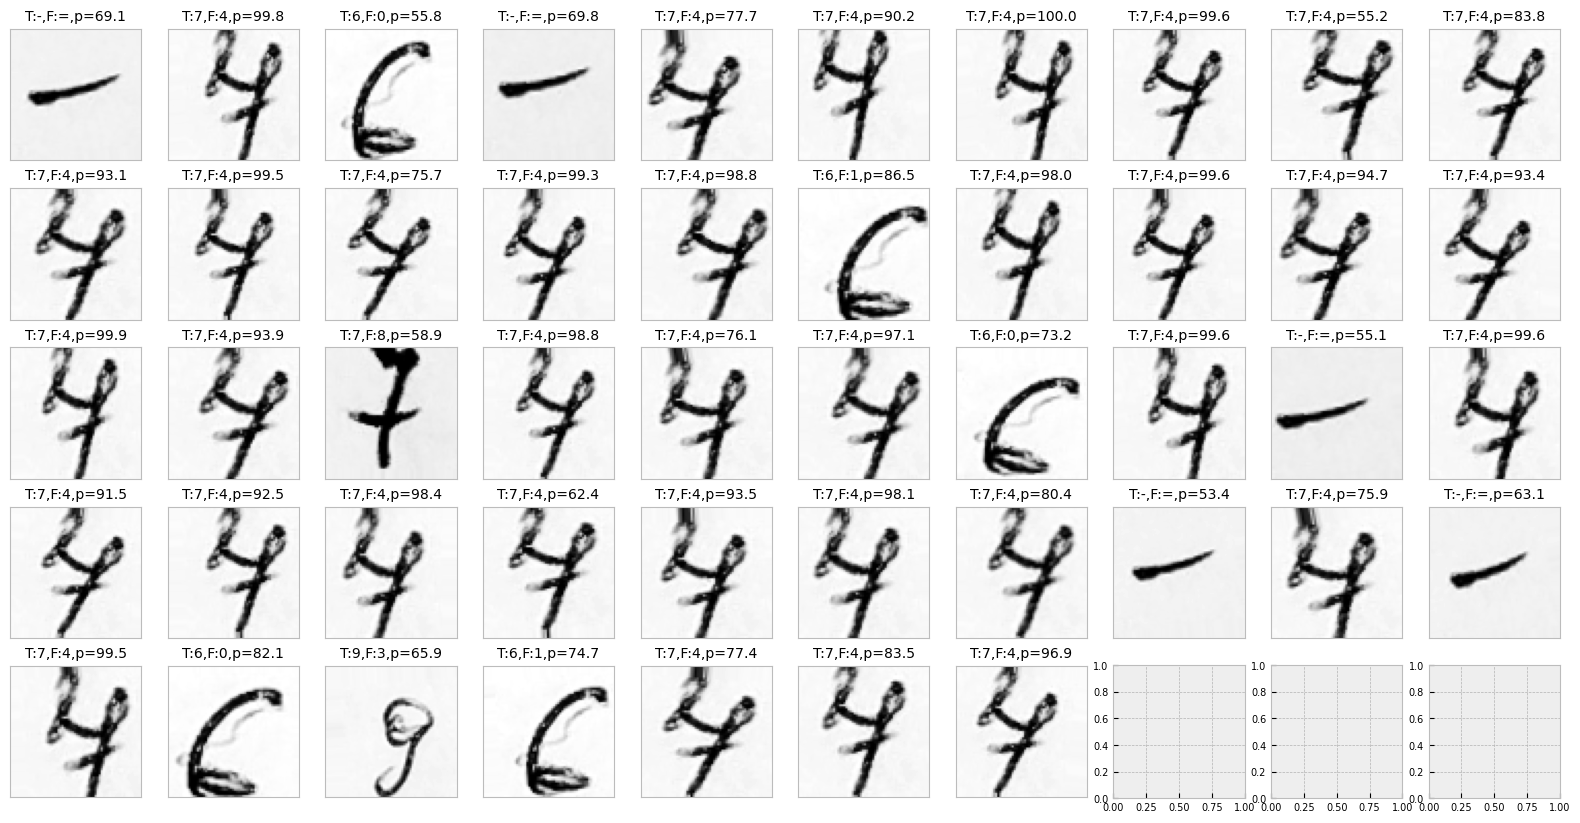

In [106]:
failed = (ytest_ext != np.argmax(ts_out, axis=1))

failed_testx = xtest_ext[failed]
failed_testy = ytest_ext[failed]
failed_testp = ts_out[failed]

print(f"Total count of missclassified: {failed_testy.shape[0]}")

h, w = 5,10
fig, axs = plt.subplots(h,w, figsize=(2*w,2*h), dpi=100)

for i in range(h*w):
    n, k = i % w, i // w
    axs[k, n].imshow(failed_testx[i], cmap='gray')
    axs[k, n].set_title(f'T:{lbl_to_nam[int(failed_testy[i])]},F:{lbl_to_nam[int(np.argmax(failed_testp[i]))]},p={round(100*np.max(failed_testp[i]), 1)}')
    axs[k,n].set_xticks([])
    axs[k,n].set_yticks([])

In [107]:
print("Most failed labels:")

print(np.unique(failed_testy, return_counts=True))

Most failed labels:
(array([ 6.,  7.,  9., 10.]), array([ 5, 36,  1,  5]))


# 3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

### A. Частина 1 лаби, обробка вхiдних даних

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aleksandr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aleksandr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aleksandr/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
# loading
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
target = 'Review Text'
label = "Rating"
df = df.astype('string').dropna() # convert to string, drop missing vals
df = df.loc[:, [target,label]] # cut dataset, since we interested only in 2 cols
df.head() # show first 5 rows


,Review Text,Rating
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
5,"I love tracy reese dresses, but this one is no...",2
6,I aded this in my basket at hte last mintue to...,5


<Axes: xlabel='Review Text', ylabel='Count'>

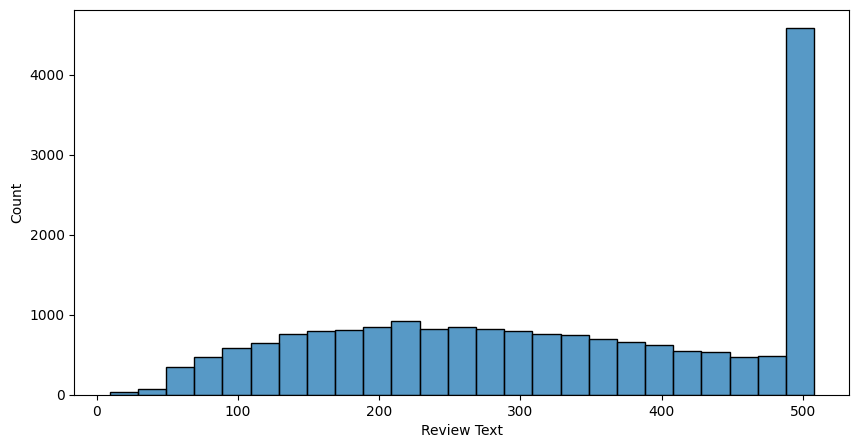

In [6]:
lens = df[target].map(lambda x: len(x)) # get lens of rows

# plot distribution of texts length
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=100)
sns.histplot(lens, ax=ax)


In [7]:
'''
Trying to use sophisticated tokenization technique
'''


# tag mapper for lemmatizer
def tag_mapper(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
    
# 1. tokenize text by words
# 2. delete punctuation chars
# 3. delete stop words since they barely influence on the sence.
# 4. tag words 
# 5. map tag for further using in lemmatization algorithm
# 6. and then lemmatize words using tag

def map_token(s):
    s = word_tokenize(s.lower())
    s = [w for w in s if w.isalpha()]
    s = [w for w in s if w not in stopwords.words('english')]
    s = [(w[0], tag_mapper(w[1])) for w in nltk.pos_tag(s)]
    s = [WordNetLemmatizer().lemmatize(*w) for w in s]
    return s

In [8]:
data = df[target].map(map_token)

In [9]:
data

2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flatter, due, adjustable, front, tie, ...
5        [love, tracy, reese, dress, one, petite, foot,...
6        [aded, basket, hte, last, mintue, see, would, ...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, work, glad...
23484    [buy, dress, wed, summer, cute, unfortunately,...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Review Text, Length: 19662, dtype: object

In [10]:
vectorizer = CountVectorizer()

# yes, we convert tokenized array back to 'corpus' - easiest solution to feed vectorizer
XM = vectorizer.fit_transform([" ".join(row) for row in data.to_list()])

# vectors - training data
xvec = XM.toarray()

In [135]:
# Leave only two classes
twoClassesMask = np.logical_or(df[label].to_numpy() == "1", df[label].to_numpy() == "5")
twoClassesMask.shape, twoClassesMask.sum()

((19662,), 11549)

In [136]:
xvec.shape, df[label].shape

((19662, 10680), (19662,))

In [137]:
# splitting to train/test data
N = twoClassesMask.sum()
SPLIT = int (N * 0.85)  # 85% of dataset

idx = list(range(N))
np.random.shuffle(idx)

x,y = xvec[twoClassesMask][idx][0:SPLIT, :], df[label].to_numpy()[twoClassesMask][idx][0:SPLIT]
xv,yv = xvec[twoClassesMask][idx][SPLIT:, :], df[label].to_numpy()[twoClassesMask][idx][SPLIT:]

x.shape, len(y), xv.shape, len(yv)

((9816, 10680), 9816, (1733, 10680), 1733)

In [140]:
# using RF classifier 

rfClf = RandomForestClassifier(max_depth=40, 
                               random_state=42, 
                               criterion='gini', 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               max_features=0.6, 
                               n_jobs=12, 
                               bootstrap=True, 
                               oob_score=True, 
                                n_estimators = 500,
                               verbose=1)
rfClf.fit(x, y)

print("Out-of-bag score:", rfClf.oob_score_)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   33.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:  8.9min finished


Out-of-bag score: 0.9503871230643847


In [141]:
p = rfClf.predict(xv)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.1s finished


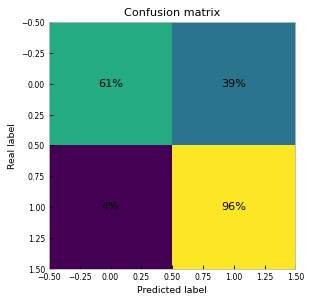

Class 0 accuracy: 60.66%
Class 1 accuracy: 96.29%
Overall: 78.47%


[60.656, 96.292]

In [142]:
plot_confusion_matrix(p, yv)

## Model

In [144]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential


In [145]:
# prepare datasets, preprocess (clear, tokenize, lemmatize,..) target column
x = data
y = df[label]

# Leave only two classes
twoClassesMask = np.logical_or(df[label].to_numpy() == "1", df[label].to_numpy() == "5")
twoClassesMask.shape, twoClassesMask.sum()

# delete samples with len == 0 for y, len <= 2 for x
sizeMask = np.logical_or(x.map(len)>2 , x.map(len) < 700)
mask = np.logical_and(twoClassesMask, sizeMask)
x,y= x[mask], y[mask]



In [146]:
# size of vocabluary
XVOC_SIZE = 10660 + 1

#using simple method to encode tokens
xtkn = tf.keras.preprocessing.text.Tokenizer(num_words=XVOC_SIZE)

# feed tokenizers
xtkn.fit_on_texts(x)

# xtkn.word_docs

In [147]:
# check for maximal length
x.map(len).max()

57

In [148]:
# encode words with index
xe = xtkn.texts_to_sequences(x)

X_LEN_MAX = 58

# pad all to same size with zeros at the end
xep = np.empty((len(xe), X_LEN_MAX))
for i, xi in enumerate(xe):
    n = len(xi)
    xep[i, ] = np.array(xi + max(0, X_LEN_MAX-n)*[0])


In [155]:
# split into test/train
RATIO = 0.2

# shuffle indixes, split then, convert to np array
N, T = len(xep), int(len(xep)*RATIO)
idx = list(range(N))
np.random.shuffle(idx)

xv, yv = xep[idx][0:T], y.map(int).map(lambda x: 0 if x==1 else 1).to_numpy()[idx][0:T]
xt, yt = xep[idx][T::], y.map(int).map(lambda x: 0 if x==1 else 1).to_numpy()[idx][T::]


# convert to type


In [156]:
# define a model

# dimensionality params
HID_DIM = 96
EMB_DIM = 512

DROPOUT_RATE = 0.56

model = Sequential()
model.add(Embedding(input_dim=XVOC_SIZE, output_dim=EMB_DIM, input_length=X_LEN_MAX, trainable=True))
model.add(LSTM(units=HID_DIM, return_sequences=True, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE))  
model.add(LSTM(units=HID_DIM // 2, dropout=DROPOUT_RATE)) 
model.add(Dense(units=2, activation='softmax')) 


In [157]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 58, 512)           5458432   
                                                                 
 lstm_22 (LSTM)              (None, 58, 96)            233856    
                                                                 
 lstm_23 (LSTM)              (None, 48)                27840     
                                                                 
 dense_11 (Dense)            (None, 2)                 98        
                                                                 
Total params: 5720226 (21.82 MB)
Trainable params: 5720226 (21.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
# fit
history=model.fit(
    xt, yt,
    epochs = 50,
    batch_size=128,
    validation_data=(xv, yv)
)


Epoch 1/50
73/73 [==============================] - 9s 125ms/step - loss: 0.0666 - accuracy: 0.9806 - val_loss: 0.1165 - val_accuracy: 0.9632
Epoch 2/50
73/73 [==============================] - 10s 143ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.1367 - val_accuracy: 0.9658
Epoch 3/50
73/73 [==============================] - 10s 141ms/step - loss: 0.0682 - accuracy: 0.9758 - val_loss: 0.1459 - val_accuracy: 0.9519
Epoch 4/50
73/73 [==============================] - 10s 141ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.1519 - val_accuracy: 0.9641
Epoch 5/50
73/73 [==============================] - 10s 142ms/step - loss: 0.0407 - accuracy: 0.9894 - val_loss: 0.1724 - val_accuracy: 0.9615
Epoch 6/50
73/73 [==============================] - 10s 141ms/step - loss: 0.0514 - accuracy: 0.9823 - val_loss: 0.2506 - val_accuracy: 0.8458
Epoch 7/50
73/73 [==============================] - 10s 141ms/step - loss: 0.0434 - accuracy: 0.9852 - val_loss: 0.1639 - val_accuracy: 0.9589


### Results

In [163]:
p = predict_tf(xv, model)

73/73 [==============================] - 1s 14ms/step


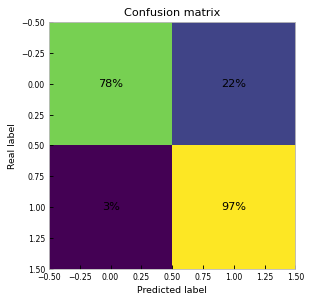

Class 0 accuracy: 77.87%
Class 1 accuracy: 97.3%
Overall: 87.59%


[77.869, 97.302]

In [164]:
plot_confusion_matrix(p, yv)

## [[Custom functions]]

In [3]:
# plot conf matrix
def plot_confusion_matrix(Y, predicted, imsize=0, per_class_acc=True):
    # get confusion matrix
    cm = confusion_matrix(Y, predicted, normalize='true')
    # image size
    n = max(np.unique(Y).shape[0], 4)
    # if arg specified, use custom size
    if imsize > 0: n = imsize
    # create fig
    fig = plt.figure(figsize=(n,n), dpi=5*(n**2))
    plt.style.use('bmh')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 7})
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')
    plt.title("Confusion matrix")
    plt.grid(False)
    #disp = ConfusionMatrixDisplay(cm)
    plt.imshow(cm)
    accuracy = []
    # print percentage
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, str(round(100*cm[i, j])) + '%',
                           ha="center", va="center", fontsize='x-large', color="k")
    plt.show()
    acc = []
    # print accuracy
    if per_class_acc:
        for i in range(cm.shape[0]):
            acc.append(round(100*cm[i,i], 3))
            print("Class {} accuracy: {}%".format(i, round(100*cm[i,i], 2)))  
        print("Overall: {}%".format(round(np.mean(acc), 2)))
        return acc
    
# returna per class accuracy
def per_class_accuracy(Y, predicted):
    cm = confusion_matrix(Y, predicted, normalize='true')
    acc = []
    for i in range(cm.shape[0]):
        acc.append(round(100*cm[i,i], 3))
        print("Class {} accuracy: {}%".format(i, round(100*cm[i,i], 2)))  
    print("Overall: {}%".format(round(np.mean(acc), 2)))
    return acc    
    
# plot history of learning    
def plot_accuracy(history, full=True):
    acc, loss = history['accuracy'], history['loss']
    fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
    plt.style.use('bmh')
    if not full: 
        acc = acc[-full:-1]
        loss = loss[-full:-1]
    ax[0].plot(acc,'.-'  , alpha=0.7,label="Accuracy")
    ax[1].plot(loss,'.-'  , alpha=0.7, label="Loss")
    try:
        vacc, vloss = history['val_accuracy'], history['val_loss']
        if not full: 
            vacc = vacc[-full:-1]
            vloss = vloss[-full:-1]
        ax[0].plot(vacc,'.-'  , alpha=0.7,label="Test accuracy")
        ax[1].plot(vloss,'.-'  , alpha=0.7, label="Test Loss")        
    except:
        print("No validation data.")
    # setting plot design
    ax[0].set_ylabel('Score')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    ax[0].set_title("Accuracy during learning")
    ax[1].set_ylabel('Score')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    ax[1].set_title("Loss during learning")
    plt.rcParams.update({'font.size': 10})
    plt.show()  
    
# predict with linear output
def predict_tf(X, classifier):
    return np.argmax(classifier.predict(X), axis=1)

# check accuracy
def check_accuracy_tf(x_val, y_val, model):
    acc = np.equal(np.argmax(model.predict(x_val), axis=1), y_val)
    return np.sum(acc) / len(y_val)



def plot_learning_history(history, imsize=100):
    keys = history.history.keys()
    test_included = sum(['val' in k for k in keys])
    if test_included:
        train_keys = [k for k in keys if 'val' not  in k]
        test_keys = [k for k in keys if 'val' in k]
        
        fig, ax = plt.subplots(len(test_keys), 1, figsize=(8, 4*len(test_keys)), dpi=imsize)
        ax = np.array(ax, ndmin=1)
        
        for i, (r, s) in enumerate(zip(train_keys, test_keys)):
            ax[i].plot(history.history[r],'.-'  , alpha=0.7,label='Train')
            ax[i].plot(history.history[s],'.-'  , alpha=0.7,label="Test")
            if 'score' in s or 'acc' in s or 'prec' in s or 'rec' in s:
                best_epoch, best_score = np.argmax(history.history[s]).astype('int'), round(np.max(history.history[s]), 6)
                ax[i].plot(best_epoch,best_score, 'k+', alpha=1, linewidth=2, label=f"Best score={best_score}, epoch={best_epoch}" )
            ax[i].set_title(r)
            ax[i].set_xlabel("Epochs")
            ax[i].legend()
    else:
        train_keys = [k for k in keys if 'val' not  in k]
        print("No validation data included")
        fig, ax = plt.subplots(len(train_keys), 1, figsize=(4, 2*len(keys)), dpi=imsize)
            
        for i, k in enumerate(keys):
            ax[i].plot(history.history[k],'.-'  , alpha=0.7)
            ax[i].set_title(k)
            ax[i].set_xlabel("Epochs")
            ax[i].legend()